<a href="https://colab.research.google.com/github/jcmachicao/pucp__gobierno_sistemas_proyectos/blob/main/men623_riesgos_simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gestión de Riesgos por Simulaciones
Autor: José Carlos Machicao (GestioDinámica)<br>
Actualizado: 2020_ENERO<br>

La gestión de riesgos es una subdisciplina de la gestión. Hacia 1950, fue concebida como una reacción bastante lúcida a las incertidumbres que se presentaban al tratar de implementar logros en las organizaciones. Estudia la toma de decisiones en situaciones de incertidumbre. Utiliza la probabilidad como un dato para la toma de decisiones, evaluando el impacto en los logros que se implementa en alguna acción organizacional. <br>
El reto de la gestión de riesgos hoy (2020) es que todavía permanece como un enfoque de tránsito con demasiadas bases en los enfoques deterministas y reduccionistas de gestión, pero en el futuro evolucionará como gestión de inestabilidades en sistemas complejos.<br>

## 1 Carga de Librerías y Archivos





In [ ]:
#@title Librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from statsmodels.graphics.mosaicplot import mosaic
%unload_ext google.colab.data_table

The google.colab.data_table extension is not loaded.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title Definición manual de datos
riesgo =        ['R01','R02','R03','R04','R05','R06','R07','R08','R09','R10',
                 'R11','R12','R13','R14','R15','R16','R17','R18','R19','R20']
impac =         [2.0,4.5,4.3,3.0,7.0, 5.0,3.3,5.3,5.5,7.5, 9.0,8.0,4.0,3.9,3.0, 4.5,5.0,9.0,7.0,6.0]
proba =         [3.0,4.0,6.0,8.3,7.2, 8.5,4.0,5.0,6.0,3.5, 3.0,2.3,8.0,3.5,9.5, 2.2,2.0,8.3,3.0,2.0]
supervisor =  ['Ana', 'Bruno', 'Cecilia', 'Ana', 'Ana', 'Cecilia', 'Ana', 'Cecilia', 'Cecilia', 'Ana',
               'Bruno', 'Henry', 'Ana', 'Bruno', 'Cecilia', 'Ana', 'Bruno', 'Cecilia', 'Ana', 'Bruno']
area =        ['Z1', 'Z4', 'Z3', 'Z2', 'Z1', 'Z1', 'Z3', 'Z4', 'Z2', 'Z1',
               'Z1', 'Z3', 'Z4', 'Z2', 'Z1', 'Z1', 'Z3', 'Z3', 'Z2', 'Z1']
data_df = pd.DataFrame([riesgo, impac, proba, supervisor, area]).transpose()
data_df.columns = ['nombre', 'impacto', 'probab', 'superv', 'area']
data_df['impacto'] = pd.to_numeric(data_df.impacto, downcast='float')
data_df['probab'] = pd.to_numeric(data_df.probab, downcast='float')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nombre   20 non-null     object 
 1   impacto  20 non-null     float32
 2   probab   20 non-null     float32
 3   superv   20 non-null     object 
 4   area     20 non-null     object 
dtypes: float32(2), object(3)
memory usage: 768.0+ bytes


In [ ]:
data_df

## 2 Exploración y Caracterización de Datos

In [ ]:
data_df.head()

,nombre,impacto,probab,superv,area
0,R01,2.0,3.0,Ana,Z1
1,R02,4.5,4.0,Bruno,Z4
2,R03,4.3,6.0,Cecilia,Z3
3,R04,3.0,8.3,Ana,Z2
4,R05,7.0,7.2,Ana,Z1


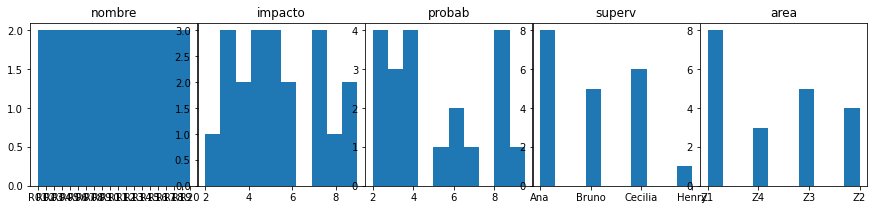

In [ ]:
#@title Visualización de Frecuencias por Variable
n_cols = len(data_df.columns)
fig, axs = plt.subplots(1,n_cols, figsize=(15,3), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.001)
axs = axs.ravel()
for i in range(n_cols):
    axs[i].hist(data_df[data_df.columns[i]])
    axs[i].set_title(data_df.columns[i])

## 3 Matriz de Impacto y Probabilidad

In [ ]:
#@title Definición de variables
var_color = data_df.area
var_label = data_df.impacto
eje_x = data_df.impacto
eje_y = data_df.probab

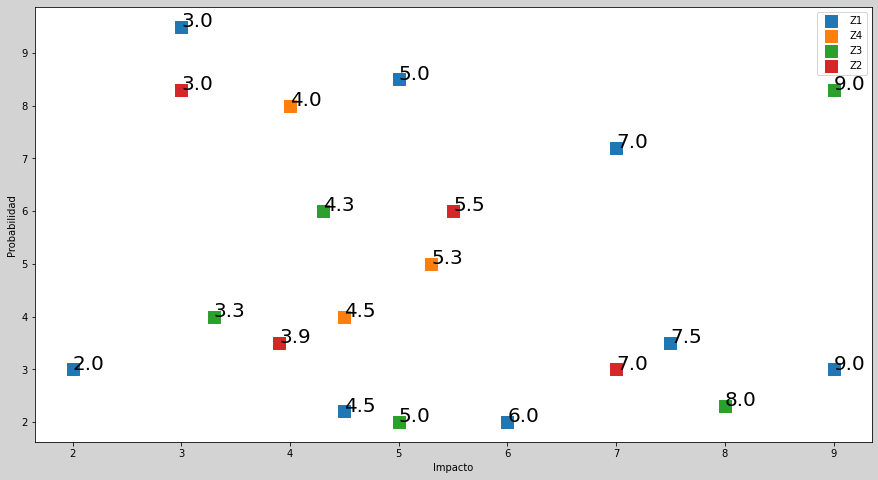

In [ ]:
#@title Gráfica de Valor Esperado (simple)
plt.figure(figsize=(15,8), facecolor='lightgray')

for c, col in enumerate(data_df.area.unique()):
  data = data_df[data_df.area==col]
  plt.scatter(data.impacto, data.probab, marker='s', label=col, s=150)

for j in range(20):
  plt.text(eje_x[j], eje_y[j], var_label[j], fontsize=20)

plt.xlabel('Impacto')
plt.ylabel('Probabilidad')
plt.legend(loc='best')
plt.show()

In [ ]:
data_df['VER'] = data_df.impacto * data_df.probab

## 4 Implementación de Respuestas

In [ ]:
#@title Definición Manual Alternativa
red_impacto = [1.0,0.0,0.0,1.0,0.0, 0.0,2.0,1.0,0.0,1.0, 0.0,1.0,1.0,1.0,1.0, 0.0,0.0,1.0,1.0,1.0]
red_probab =  [0.0,0.0,1.0,0.0,0.0, 1.0,2.0,1.0,0.0,1.0, 1.0,0.0,2.0,0.0,0.0, 1.0,1.0,2.0,2.0,0.0]
costo_resp =  [4.3,0.0,4.4,4.1,0.0, 4.9,8.2,6.4,0.0,4.4, 6.8,4.5,2.2,2.8,4.1, 6.1,4.2,8.9,12.2,4.3]
data_df['impa_nuevo'] = data_df.impacto - red_impacto
data_df['prob_nueva'] = data_df.probab - red_probab
data_df['VER_n'] = data_df.impa_nuevo * data_df.prob_nueva
data_df['c_resp'] = costo_resp


In [ ]:
#@title Cálculos Adicionales
data_df['verif_resp'] = ((data_df.VER - data_df.VER_n) >= data_df.c_resp) & (data_df.c_resp != 0)
data_df['rescate'] = data_df.VER - data_df.VER_n
data_df

,nombre,impacto,probab,superv,area,VER,impa_nuevo,prob_nueva,VER_n,c_resp,verif_resp,rescate
0,R01,2.0,3.0,Ana,Z1,6.000000,1.0,3.0,3.000000,4.3,False,3.000000e+00
1,R02,4.5,4.0,Bruno,Z4,18.000000,4.5,4.0,18.000000,0.0,False,0.000000e+00
2,R03,4.3,6.0,Cecilia,Z3,25.800001,4.3,5.0,21.500001,4.4,False,4.300000e+00
3,R04,3.0,8.3,Ana,Z2,24.900002,2.0,8.3,16.600000,4.1,True,8.300001e+00
4,R05,7.0,7.2,Ana,Z1,50.399998,7.0,7.2,50.399999,0.0,False,-9.536743e-07
5,R06,5.0,8.5,Cecilia,Z1,42.500000,5.0,7.5,37.500000,4.9,True,5.000000e+00
6,R07,3.3,4.0,Ana,Z3,13.200000,1.3,2.0,2.600000,8.2,True,1.060000e+01
7,R08,5.3,5.0,Cecilia,Z4,26.500000,4.3,4.0,17.200001,6.4,True,9.299999e+00
8,R09,5.5,6.0,Cecilia,Z2,33.000000,5.5,6.0,33.000000,0.0,False,0.000000e+00
9,R10,7.5,3.5,Ana,Z1,26.250000,6.5,2.5,16.250000,4.4,True,1.000000e+01


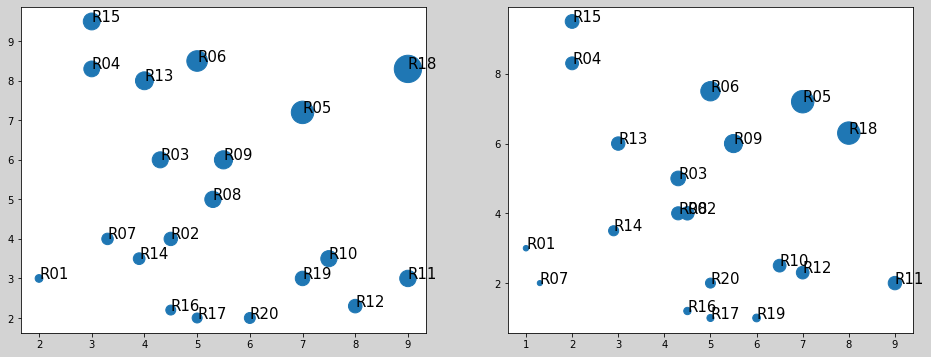

In [ ]:
#@title Gráfica Comparada de Valor Esperado
# Explica el cambio del impacto y la probabilidad luego de la implementación de respuestas
plt.figure(figsize=(16,6), facecolor='lightgray')

plt.subplot(1,2,1)
plt.scatter(data_df.impacto, data_df.probab,
            s=pd.Series([np.round(float(i)*10) for i in data_df.VER]),
            marker='o')
for j in range(20):
  plt.text(data_df.impacto[j], data_df.probab[j],
           data_df.nombre[j],
           fontsize=15)

plt.subplot(1,2,2)
plt.scatter(data_df.impa_nuevo, data_df.prob_nueva,
            s=pd.Series([np.round(float(i)*10) for i in data_df.VER_n]),
            marker='o')
for j in range(20):
  plt.text(data_df.impa_nuevo[j], data_df.prob_nueva[j],
           data_df.nombre[j],
           fontsize=15)

In [ ]:
print('Valor Rescatado', sum(data_df.VER)-sum(data_df.VER_n), '\n', 'Total de costo de respuestas', sum(data_df.c_resp))

Valor Rescatado 139.6000031232834 
 Total de costo de respuestas 92.8


In [ ]:
data_df.columns

Index(['nombre', 'impacto', 'probab', 'superv', 'area', 'VER', 'impa_nuevo',
       'prob_nueva', 'VER_n', 'c_resp', 'verif_resp', 'rescate'],
      dtype='object')

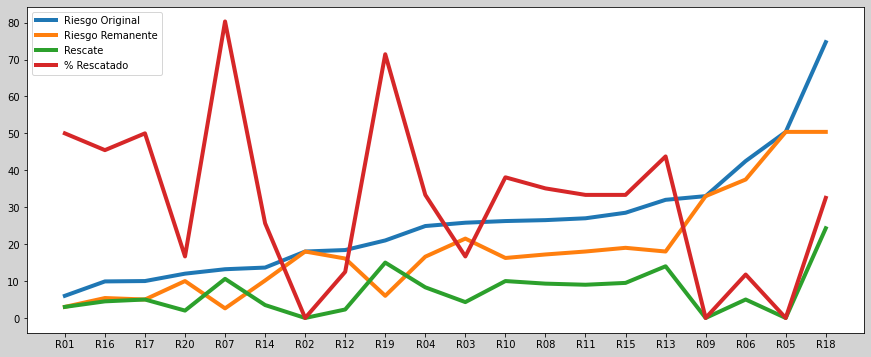

In [ ]:
#@title Diagramación de cambios en riesgos
data = data_df.sort_values(by='VER')
l1 = data.VER
l2 = data.VER_n
l3 = data.rescate

xx = data.nombre
plt.figure(figsize=(15,6), facecolor='lightgray')

plt.plot(xx, l1, lw=4, label='Riesgo Original')
plt.plot(xx, l2, lw=4, label='Riesgo Remanente')
plt.plot(xx, l3, lw=4, label='Rescate')
plt.plot(xx, l3/l1*100, lw=4, label='% Rescatado')

plt.legend()
plt.show()

## 5 Análisis de densidad de riesgos

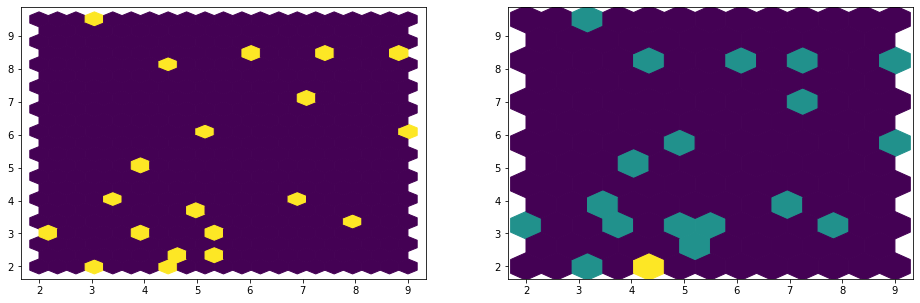

In [ ]:
#@title Densidad por HexBin
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.hexbin(data_df.impacto, y=data.probab, gridsize=20)
ax2.hexbin(data_df.impacto, y=data.probab, gridsize=12)

plt.show()

## 6 Predictibilidad de Riesgos

El objetivo de la predictibilidad de riesgos es que, dada una variable (en este caso se puede elegir el surpevisor) cómo las otras variables ayudan a predecirlo. En otras palabras, a partir de variables como el Valor Esperado de Riesgos, el impacto, la probabilidad y el costo de respuesta, se puede predecir de qué supervisor se trata.

In [ ]:
data_feature = data_df[['impacto', 'VER', 'c_resp']]
data_target = pd.factorize(data_df.superv)[0]+1
print(data_target)

[1 2 3 1 1 3 1 3 3 1 2 4 1 2 3 1 2 3 1 2]


### Clasificación por Arbol de Decisiones

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier(max_depth=2, criterion='gini')

In [ ]:
dtree.fit(data_feature, data_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

No handles with labels found to put in legend.


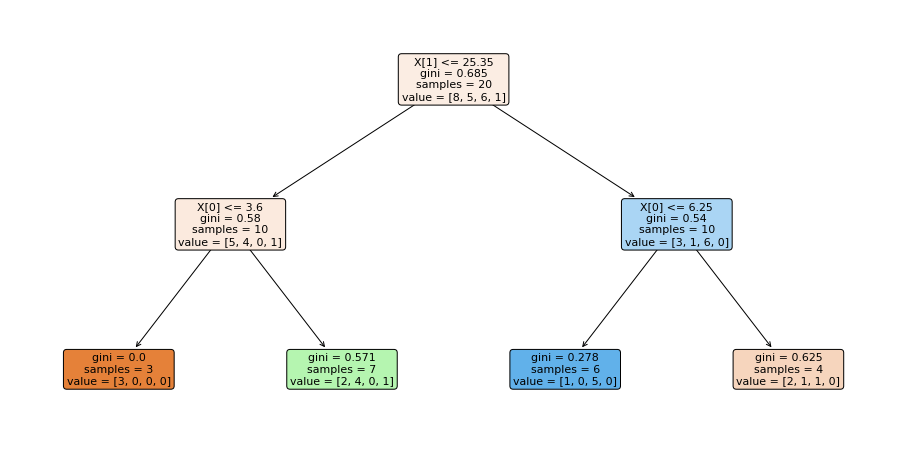

In [ ]:
plt.figure(figsize=(16,8))
plt.legend(loc='right')
from statsmodels.graphics.mosaicplot import mosaic
tree.plot_tree(dtree, rounded=True, max_depth=2, fontsize=11, label='all', filled=True)
plt.show()

In [ ]:
prediccion = dtree.predict(np.array([[4.0, 15.0, 5.0], [1.0, 5.0, 4.0]]))
print(prediccion)

[2 1]


### Clasificación por Mosaico

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
vars = ['area', 'nombre']

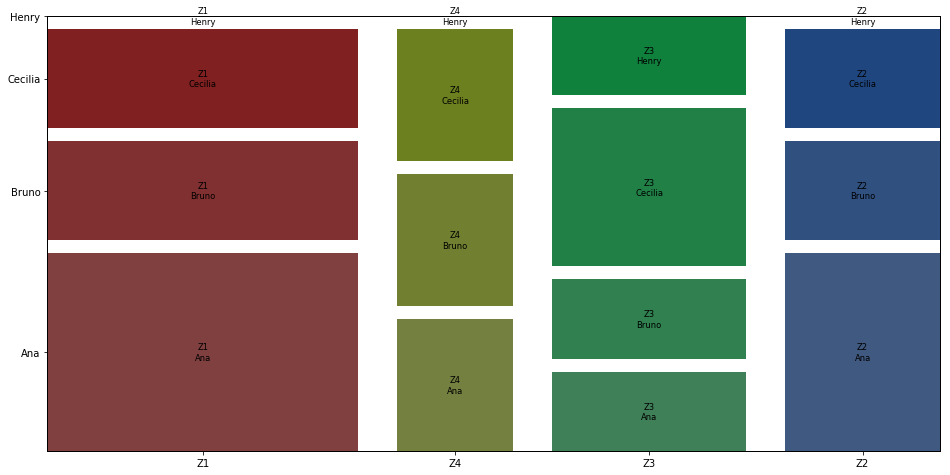

In [ ]:
#base = data_df.sort_values(by=vars[0])
with plt.rc_context():
    plt.rc('figure', figsize=(16,8))
    plt.rc('font', size=10)
    mosaic(data_df, ['area', 'superv'], gap=0.05) #labelizer=labels
    plt.show()

## 7 Modelamiento Predictivo

In [ ]:
from pandas.plotting import radviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Convertir datos categoricos en columnas 0...1
convertidor = LabelEncoder()
data_df['area_n'] = convertidor.fit_transform(data_df['area'])
data_df['superv_n'] = convertidor.fit_transform(data_df['superv'])

In [ ]:
data_X = data_df[['impacto', 'probab', 'VER_n', 'c_resp', 'superv_n']]
data_y = np.array(data_df[['area_n']]).ravel()

In [ ]:
data_y

array([0, 3, 2, 1, 0, 0, 2, 3, 1, 0, 0, 2, 3, 1, 0, 0, 2, 2, 1, 0])

In [ ]:
np.array(data_df.area)

array(['Z1', 'Z4', 'Z3', 'Z2', 'Z1', 'Z1', 'Z3', 'Z4', 'Z2', 'Z1', 'Z1',
       'Z3', 'Z4', 'Z2', 'Z1', 'Z1', 'Z3', 'Z3', 'Z2', 'Z1'], dtype=object)

In [ ]:
model = MultinomialNB().fit(data_X, data_y)

In [ ]:
X_test = [[3,4,30,4,2],[5,7,65,3,3],[5,1,65,5,2]]
prediccion = model.predict(X_test)
prediccion
convertidor.inverse_transform(prediccion)

array(['Ana', 'Ana', 'Ana'], dtype=object)

In [ ]:
prediccion

array([0, 0, 0])